# Visualizasion in Python 

## Mining and visualising real-world data
### Learning Activity: Loading the Python libraries

First you need to load the required Python libraries. Libraries are extensions to the base python that add functionality or help to make tasks more convenient to do. 

In [3]:
# compatibility with python2 and 3
from __future__ import print_function, division
from __future__ import absolute_import 

# numerical capacity
import scipy as scipy
import numpy as np
import pandas as pd

# matplotlib setup
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

# extra tools
from mpl_toolkits.mplot3d.axes3d import Axes3D 

import warnings


# The dataset

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

The dataset contains demographic information and what financial services are used by approximately 33,610 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, You are asked to make predictions for each unique id in the test dataset about the likelihood of the person having a bank account.

### Learning Activity: Importing the data

As a first step we load the dataset from the provided `Train_v2.csv` file with `pandas`. To achieve this you will use the `.read_csv()` method from Pandas. We just need to point to the location of the dataset and indicate under what name we want to store the data, i.e. `df`. 

Once the data has been loaded, you can look at the first few instances using the `.head()` method.

In [4]:
# Import the data and explore the first few rows
df = pd.read_csv('https://raw.githubusercontent.com/StarBoy01/IndabaX-Sudan-2019/master/Train_v2.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [6]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [7]:
df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

## Exploratory Data Analysis

## dataset balance?

Lets see if our dataset is balanced or not by checking our target distribution

In [8]:
df.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [11]:
a = len(df[df.bank_account=='Yes'])
b = len(df[df.bank_account=='No'])
c = len(df)
print('We have an imbalanced dataset with a %i/%i ratio'%((b/c*100),(a/c*100)+1)) #The +1 is to eliminate any fraction

We have an imbalanced dataset with a 85/15 ratio


Stratification will be needed when doing cross-validation to preserve this ratio in our folds!

## Distributions

### Age of respondent

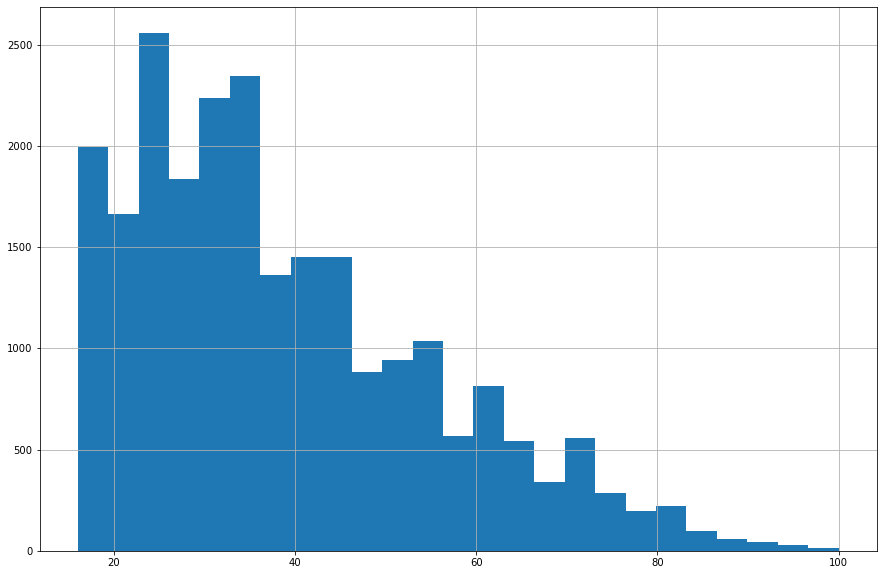

In [12]:
hist_age = df.age_of_respondent.hist(bins=25,figsize=[15,10])

### Country

<AxesSubplot:>

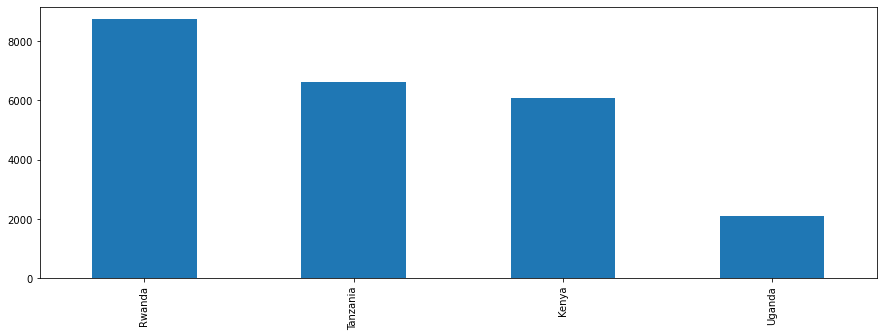

In [13]:
df['country'].value_counts().plot(kind='bar',figsize=[15,5])

### Let's check the year variable

In [14]:
df.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [15]:
df[df.year==2016].country.value_counts()

Rwanda    8735
Name: country, dtype: int64

In [16]:
df[df.year==2017].country.value_counts()

Tanzania    6620
Name: country, dtype: int64

In [17]:
df[df.year==2018].country.value_counts()

Kenya     6068
Uganda    2101
Name: country, dtype: int64

### Bivariate Analysis using the target

In [18]:
## target encoding
di = {"Yes": 1, "No": 0}
df.replace({"bank_account": di},inplace=True)

### Age of Respondent 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_of_respondent', ylabel='bank_account'>

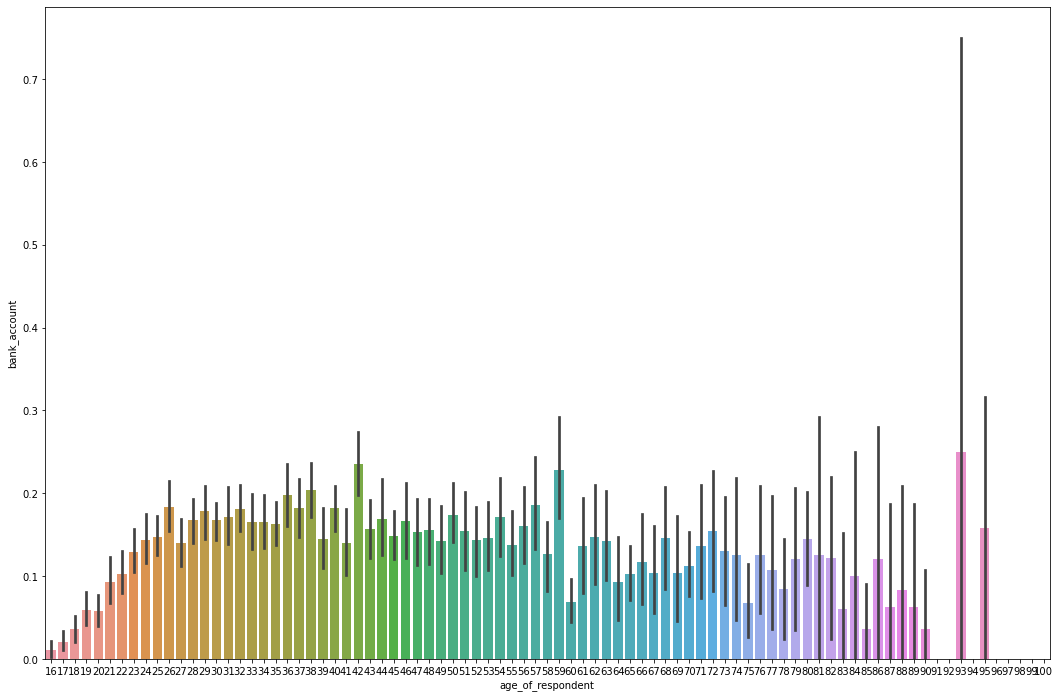

In [19]:
plt.figure(figsize=[18,12])
sns.barplot('age_of_respondent', 'bank_account', data=df)

We can safely say that ,generally speaking and by also looking at the general trend of the plot, older people are less likely to have a bank_account. We have some outliers beyond the 90 mark for the age variable.

### Gender of Respondent

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender_of_respondent', ylabel='bank_account'>

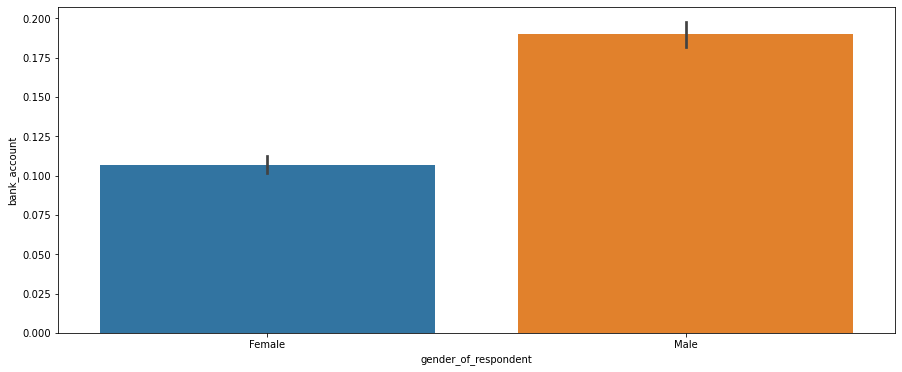

In [20]:
plt.figure(figsize=[15,6])
sns.barplot('gender_of_respondent', 'bank_account', data=df)

Males are more likely to have a bank account according to this plot. Maybe we can combine gender and age, and see if put together, we could notice something and create a feature that better represents this combination.


### Age + Gender 

<AxesSubplot:xlabel='Females age'>

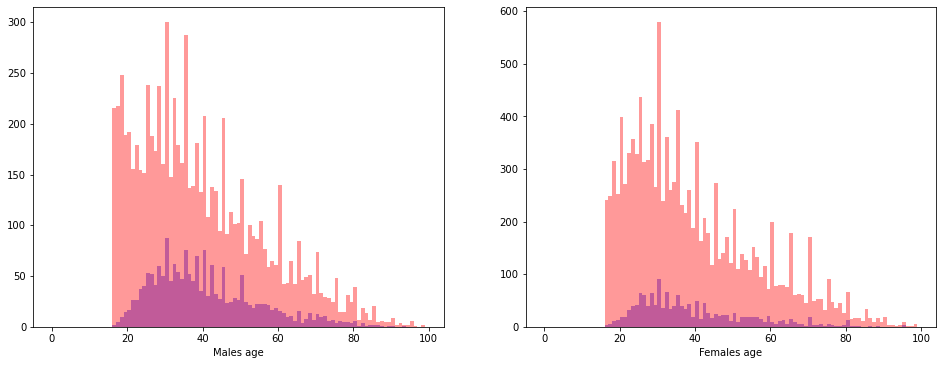

In [26]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.distplot(df[(df.gender_of_respondent=='Male')&(df.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue')
sns.distplot(df[(df.gender_of_respondent=='Male')&(df.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red',
            axlabel='Males age')
plt.subplot(332)
sns.distplot(df[(df.gender_of_respondent=='Female')&(df.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue')
sns.distplot(df[(df.gender_of_respondent=='Female')&(df.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red',
            axlabel='Females age')

In [22]:
df.gender_of_respondent.value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

For both genders, the peak in the likelihood of having a bank_account happens between 20-40. But the number of males , keeping in mind that in the trainset they are less than females by 4k, who have a bank_account is closer to those who don't compared to females. Meaning, age plays a role for both genders almost the same way, but gender has an important role.

### Country

<AxesSubplot:xlabel='country', ylabel='bank_account'>

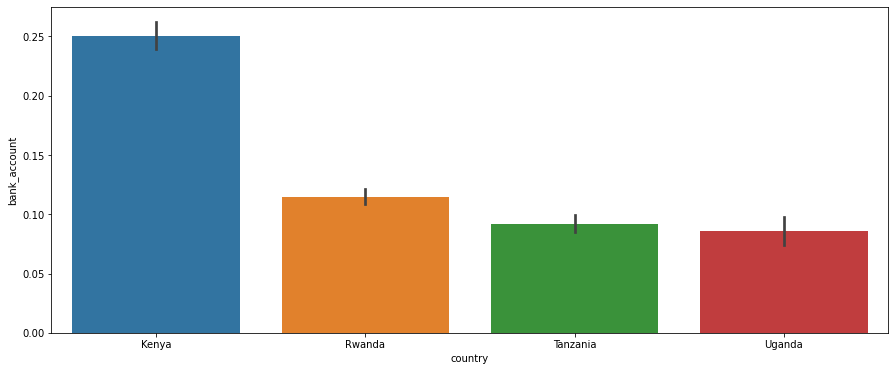

In [27]:
plt.figure(figsize=[15,6])
sns.barplot('country', 'bank_account', data=df)

### Household Size

<AxesSubplot:xlabel='household_size', ylabel='bank_account'>

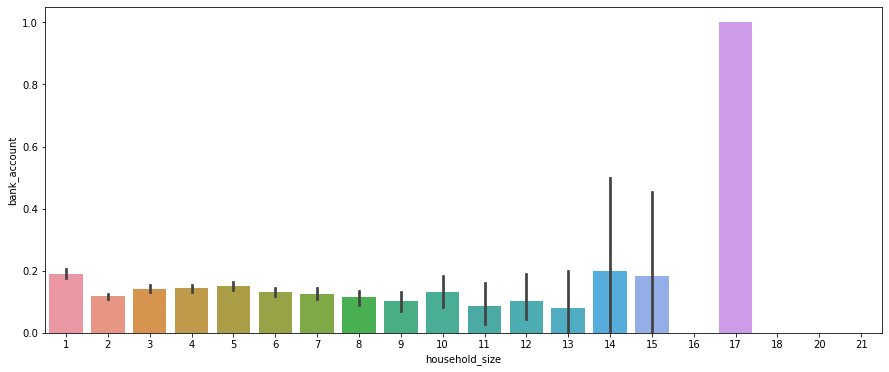

In [28]:
plt.figure(figsize=[15,6])
sns.barplot('household_size', 'bank_account', data=df)

Data needs to be cleaned to get something useful out of this variable. as you can see the bigger values has fewer samples and they might also have outliers.

### Marital Status

<AxesSubplot:xlabel='marital_status', ylabel='bank_account'>

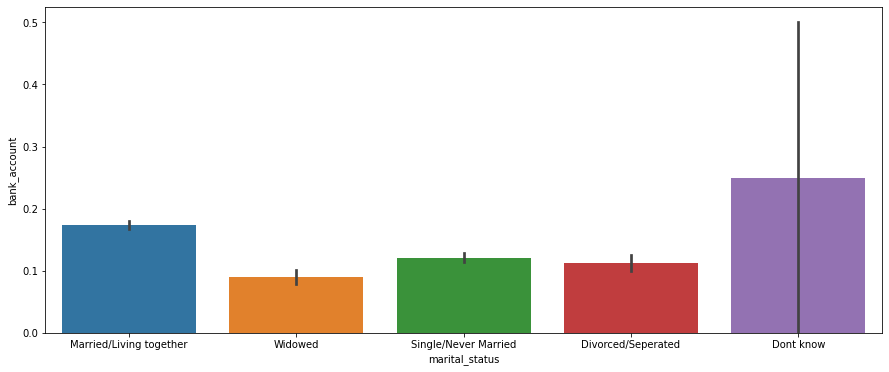

In [29]:
plt.figure(figsize=[15,6])
sns.barplot('marital_status', 'bank_account', data=df)

almost similar across all categories, the undersampled Dont know with 38 samples might cause a problem.

### Lets see interactions between features

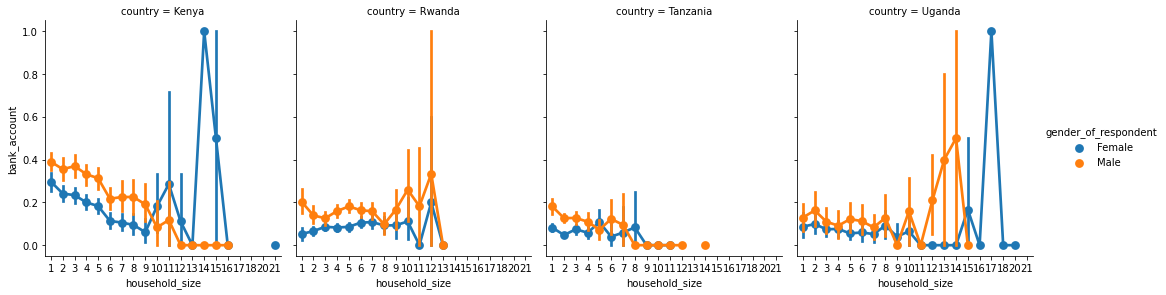

In [30]:
g = sns.factorplot(x="household_size", y="bank_account", hue="gender_of_respondent", col="country",
                   data=df, aspect=0.9, size=4, ci=95.0)

for Kenyans, we can see that household_size is inversely proportionnal to the target, except for some outliers that mess up the plot at bigger household_size values. For Tanzanians , the decline is clearer with lesser outliers. Uganda and Rwanda also have a small decline but the outliers are at it again.

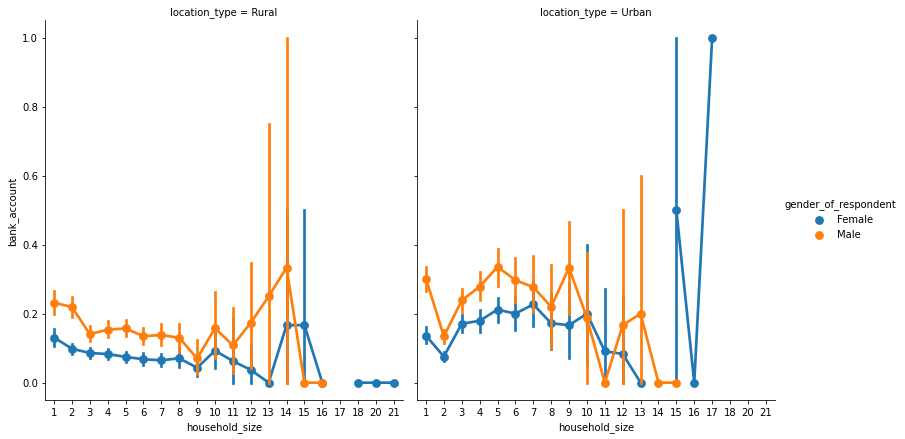

In [31]:
g = sns.factorplot(x="household_size", y="bank_account", hue="gender_of_respondent", col="location_type",
                   data=df, aspect=0.9, size=6, ci=95.0)

### Binnedage-based and gender-based plots vs target and other variables

In [32]:
## binning the age!
bins = [10, 20, 30, 40,60,80,100]
labels = [1,2,3,4,5,6]
df['binnedage'] = pd.cut(df['age_of_respondent'], bins=bins, labels=labels)

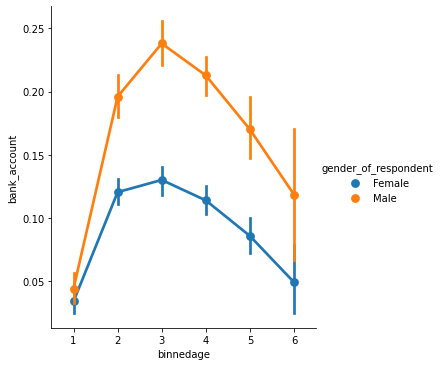

In [33]:
g = sns.factorplot(x="binnedage", y="bank_account", hue="gender_of_respondent",
                   data=df, aspect=0.9, size=5, ci=95.0)

Both genders follow the same pattern, it gets the highest between 20-30, and then starts slowly decreasing. No need to create a new feature based on feature interaction age-gender

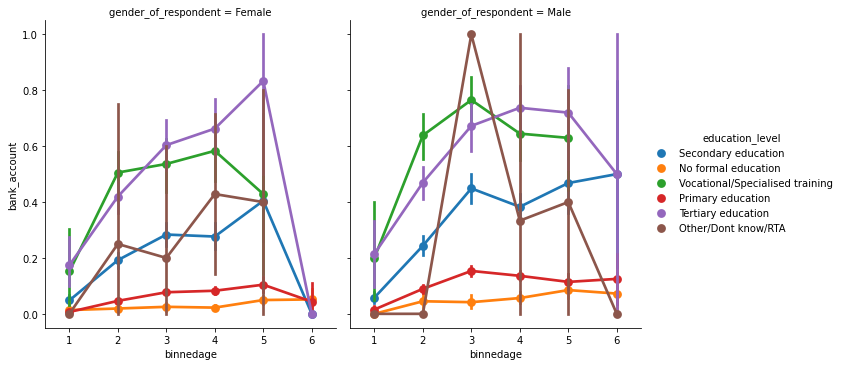

In [34]:
g = sns.factorplot(x="binnedage", y="bank_account", hue="education_level",col='gender_of_respondent',
                   data=df, aspect=0.9, size=5, ci=95.0)

Males and females share the same pattern for educaton level for the same ages

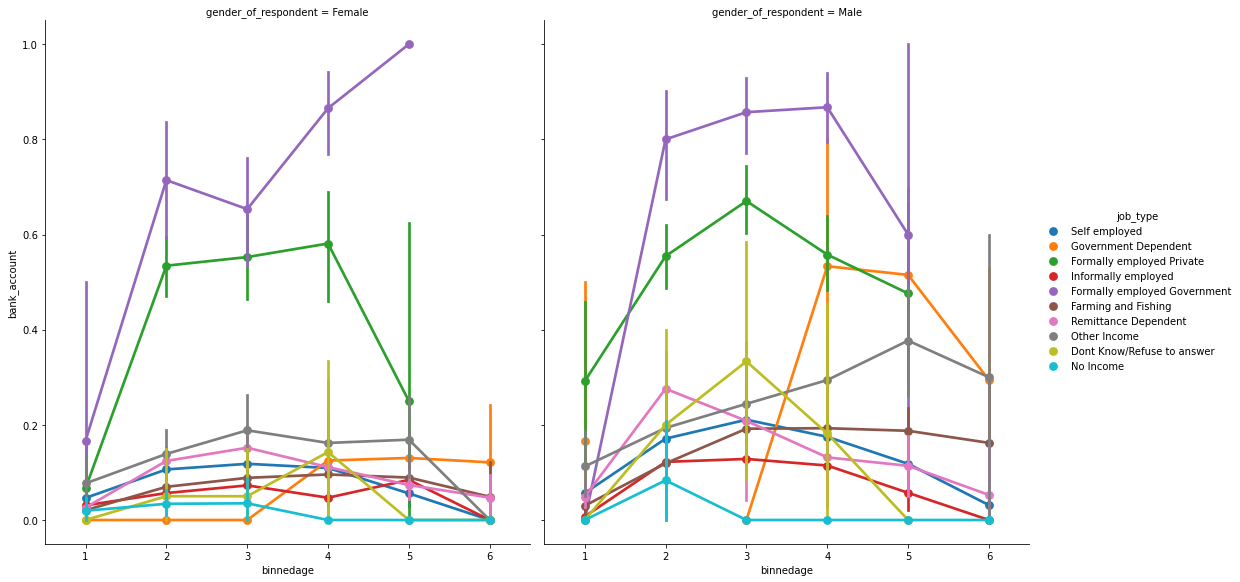

In [35]:
g = sns.factorplot(x="binnedage", y="bank_account", hue="job_type",col='gender_of_respondent',
                   data=df, aspect=0.9, size=8, ci=95.0)